In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
# Load the dataset
data = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [6]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  12-01-2010 08:26       2.55     17850.0  United Kingdom  
1  12-01-2010 08:26       3.39     17850.0  United Kingdom  
2  12-01-2010 08:26       2.75     17850.0  United Kingdom  
3  12-01-2010 08:26       3.39     17850.0  United Kingdom  
4  12-01-2010 08:26       3.39     17850.0  United Kingdom  


In [7]:
# Perform EDA
print("\nBasic Statistics:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())


Basic Statistics:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

Missing Values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

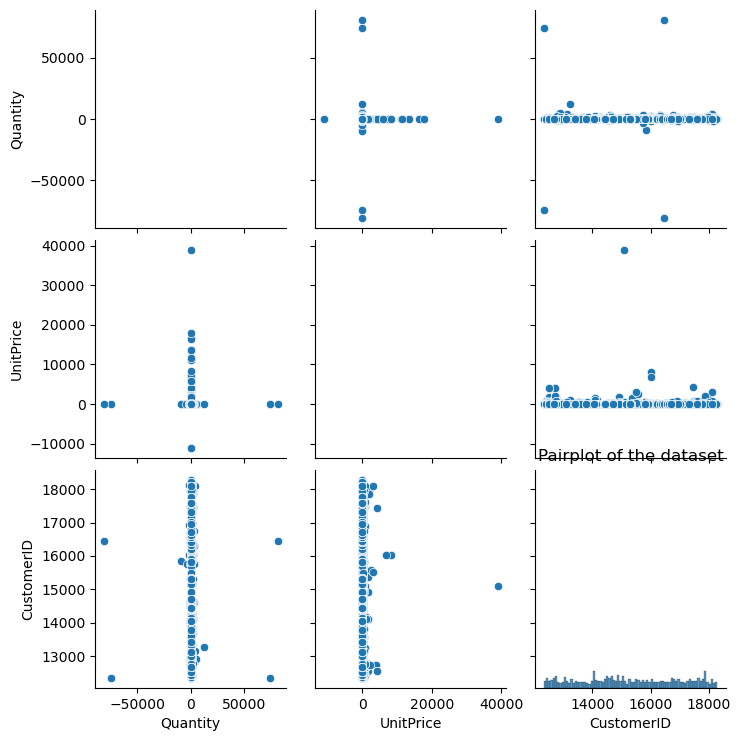

In [8]:
# Visualize data distributions
plt.figure(figsize=(10, 6))
sns.pairplot(data)
plt.title('Pairplot of the dataset')
plt.show()

In [10]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns for clustering purposes
data_numeric = data.drop(columns=non_numeric_columns)

# Check if there are still any missing values
print("\nMissing Values in Numeric Data:")
print(data_numeric.isnull().sum())

# Drop rows with missing values in numeric data
data_numeric = data_numeric.dropna()

# Standardize the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Display the shape of the scaled data
print("\nShape of scaled data:", data_scaled.shape)


Non-numeric columns: Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

Missing Values in Numeric Data:
Quantity           0
UnitPrice          0
CustomerID    135080
dtype: int64

Shape of scaled data: (406829, 3)


C:\Users\Dell\AppData\Local\Temp\ipykernel_19964\4114959048.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_pca[:, 0], data_pca[:, 1], s=50, cmap='viridis')


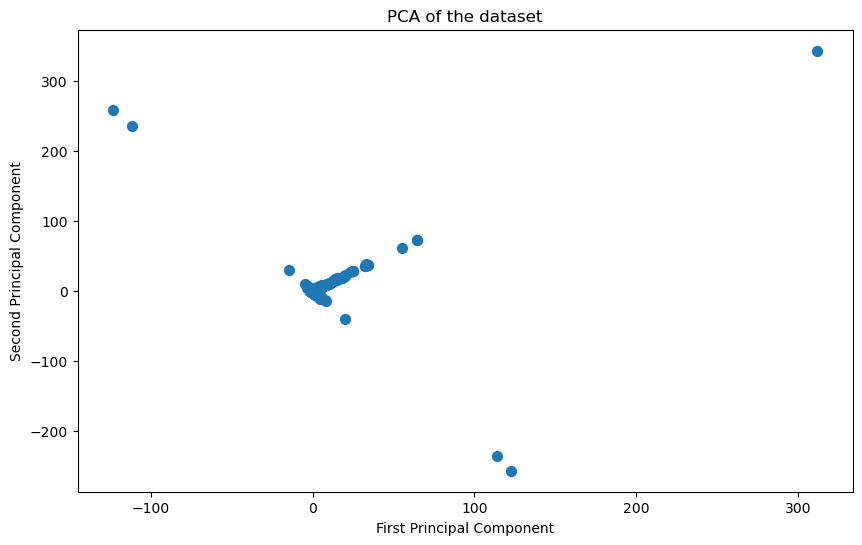

In [11]:
# Perform PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], s=50, cmap='viridis')
plt.title('PCA of the dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [16]:
# Drop rows with missing values in numeric data
data_numeric = data_numeric.dropna()

# Synchronize the original data by dropping the same rows with missing values
data_synchronized = data.dropna(subset=data_numeric.columns)

# Ensure the indexes are aligned
assert data_synchronized.index.equals(data_numeric.index), "Indexes are not aligned!"

# Standardize the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the synchronized original data
data_synchronized['Cluster'] = clusters

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel_19964\817884492.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_synchronized['Cluster'] = clusters


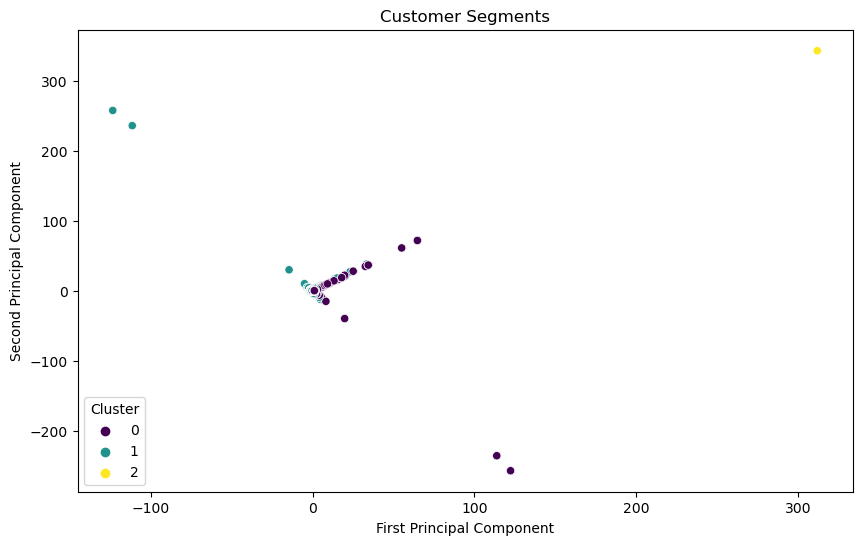


Cluster Statistics:
          Quantity     UnitPrice    CustomerID  Cluster
Cluster                                                
0        13.595621      3.692338  13905.703607      0.0
1        10.301306      2.988834  16873.014239      1.0
2        -1.000000  38970.000000  15098.000000      2.0


In [18]:
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Cluster')
plt.show()

# Select only the numeric columns
numeric_columns = data_synchronized.select_dtypes(include=[np.number]).columns

# Calculate and display cluster statistics for numeric columns
cluster_statistics = data_synchronized.groupby('Cluster')[numeric_columns].mean()

print("\nCluster Statistics:")
print(cluster_statistics)

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel_19964\1228525245.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_synchronized['Cluster'] = clusters


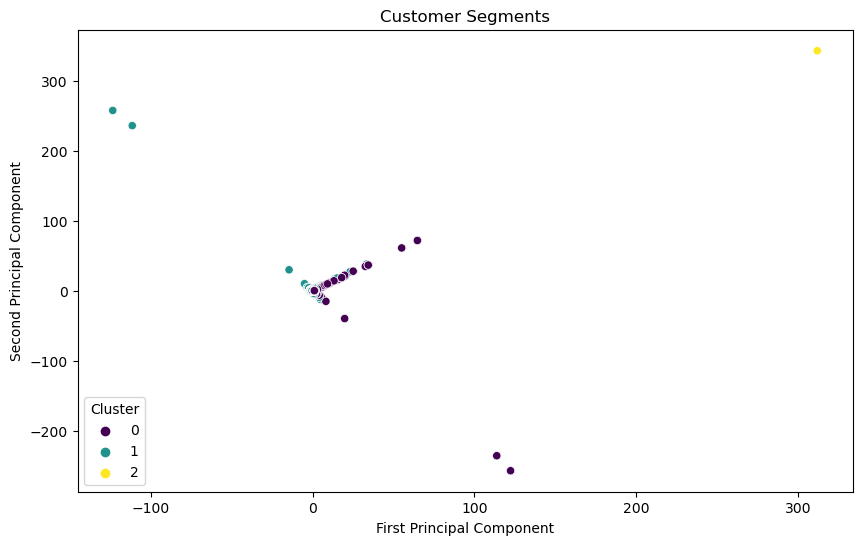


Cluster Statistics:
          Quantity     UnitPrice    CustomerID  Cluster
Cluster                                                
0        13.595621      3.692338  13905.703607      0.0
1        10.301306      2.988834  16873.014239      1.0
2        -1.000000  38970.000000  15098.000000      2.0


In [21]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in numeric data
data_numeric = data.drop(columns=non_numeric_columns).dropna()

# Synchronize the original data by dropping the same rows with missing values
data_synchronized = data.dropna(subset=data_numeric.columns)

# Ensure the indexes are aligned
assert data_synchronized.index.equals(data_numeric.index), "Indexes are not aligned!"

# Standardize the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the synchronized original data
data_synchronized['Cluster'] = clusters

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Cluster')
plt.show()

# Select only the numeric columns
numeric_columns = data_synchronized.select_dtypes(include=[np.number]).columns

# Calculate and display cluster statistics for numeric columns
cluster_statistics = data_synchronized.groupby('Cluster')[numeric_columns].mean()

print("\nCluster Statistics:")
print(cluster_statistics)
